In [1]:
import networkx
import osmnx as ox
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point, LineString
import shapely
from shapely import geometry

import os
import glob
import pointpats 
from pointpats import window
from pointpats.window import poly_from_bbox, as_window, Window, to_ccf
from pointpats.centrography import hull, mbr

from matplotlib import pyplot as plt

/Users/orianna/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
from shapely.geometry import Point, LineString

In [3]:
import spaghetti
import esda

/Users/orianna/opt/anaconda3/lib/python3.8/site-packages/spaghetti/network.py:39: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(f"{dep_msg}", FutureWarning)


## Introduction:



In [4]:
Leeds_graph = ox.graph_from_address("Leeds, United Kingdom", dist = 500, network_type="drive")

In [5]:
# show the coordinates of the area chosen
coordinates = ox.graph_from_address("Leeds, United Kingdom", dist = 500, network_type="drive", return_coords=True)
coordinates

(<networkx.classes.multidigraph.MultiDiGraph at 0x7fe454a09d60>,
 (53.7974185, -1.5437941))

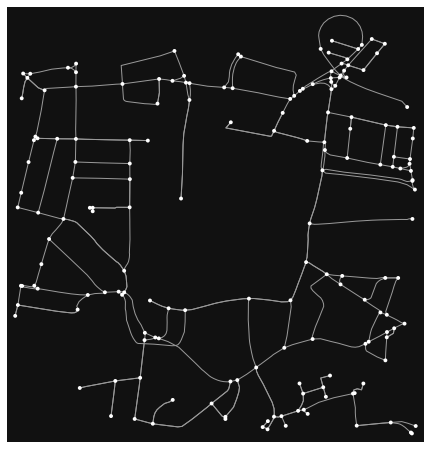

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [6]:
#show 1 square kilometre around the centre of Leeds
ox.plot_graph(Leeds_graph)

In [7]:
# estimate whether this is a planar graph, if True, it is.
networkx.check_planarity(Leeds_graph)

(True, <networkx.algorithms.planarity.PlanarEmbedding at 0x7fe45426d9d0>)

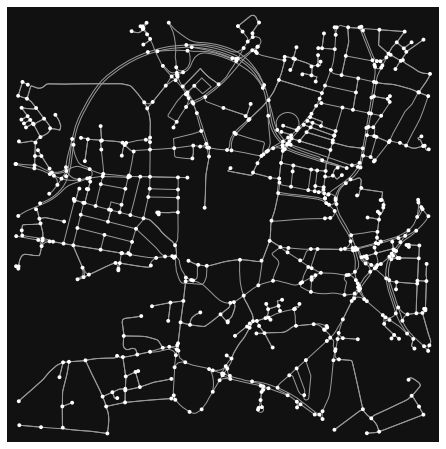

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [8]:
Leeds_graph1 = ox.graph_from_address("Leeds, United Kingdom", dist = 1000, network_type="drive")
ox.plot_graph(Leeds_graph1)

In [9]:
# estimate whether this is a planar graph, if True, it is.
networkx.check_planarity(Leeds_graph1)

(False, None)

In [10]:
# show the geocoded coordinates of Leeds centre
Leeds_coords = ox.graph_from_address("Leeds, United Kingdom",dist = 500,network_type="drive", return_coords=True)
Leeds_coords

(<networkx.classes.multidigraph.MultiDiGraph at 0x7fe4540b8fd0>,
 (53.7974185, -1.5437941))

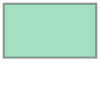

In [11]:
# show the Leeds centre area

p1 = geometry.Point(-1.535651, 53.792818)
p2 = geometry.Point(-1.551083, 53.792818)
p3 = geometry.Point(-1.551083, 53.801799)
p4 = geometry.Point(-1.535651, 53.801799)
LC_List = [p1, p2, p3, p4, p1]
LC_poly = geometry.Polygon(LC_List)
LC_poly

## Aggregate across multiple years of accident data

In [12]:
#View csv files in the same folder as this py file
csv_list = glob.glob('*.csv')
csv_list

['2019.csv', '2018.csv', '2015.csv', '2016.csv', '2017.csv']

In [13]:
#View the number of csv files in the same folder as this py file
print('There are %s csv files'% len(csv_list))

There are 5 csv files


In [14]:
df_2019 = pd.read_csv('2019.csv', encoding='latin1' )

In [15]:
df_2018 = pd.read_csv('2018.csv', encoding='latin1' )

In [16]:
df_2017 = pd.read_csv('2017.csv', encoding='latin1' )

In [17]:
df_2016 = pd.read_csv('2016.csv', encoding='latin1' )

In [18]:
df_2015 = pd.read_csv('2015.csv', encoding='latin1')

In [19]:
# concat the data from 2015-2019
point_df = pd.concat(objs=[df_2019, df_2018, df_2017, df_2016, df_2015], axis=0, join="outer")

In [20]:
# show the multiple years of accident data
point_df

,Reference Number,Grid Ref: Easting,Grid Ref: Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,1st Road Class & No,Road Surface,Lighting Conditions,...,Type of Vehicle,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Accident Fields_Reference Number,Vehicle Fields_Reference Number,Casualty Fields_Reference Number,Casualty Veh No,Expr1
0,58F1730,436147,434957,2,15/08/2019,1812,3,A6120,1,1,...,11,2,3,2,6,NaN,NaN,NaN,NaN,NaN
1,58F1730,436147,434957,2,15/08/2019,1812,3,A6120,1,1,...,11,2,3,1,9,NaN,NaN,NaN,NaN,NaN
2,58F1730,436147,434957,2,15/08/2019,1812,3,A6120,1,1,...,11,2,3,2,39,NaN,NaN,NaN,NaN,NaN
3,58F1730,436147,434957,2,15/08/2019,1812,3,A6120,1,1,...,11,2,3,1,5,NaN,NaN,NaN,NaN,NaN
4,58F1730,436147,434957,2,15/08/2019,1812,3,A6120,1,1,...,11,2,3,2,8,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2659,2CV1152,430942,435672,3,31-Dec-15,1908,A,NaN,Wet / Damp,Darkness: street lights present and lit,...,Taxi/Private hire car,Passenger,Slight,Female,4,NaN,NaN,NaN,NaN,NaN
2660,2CV1424,431965,435834,2,31-Dec-15,2208,A,NaN,Dry,Darkness: street lights present and lit,...,Car,Driver/Rider,Slight,Female,23,NaN,NaN,NaN,NaN,NaN
2661,2CV1424,431965,435834,2,31-Dec-15,2208,A,NaN,Dry,Darkness: street lights present and lit,...,Car,Passenger,Slight,Female,23,NaN,NaN,NaN,NaN,NaN
2662,31F0582,430278,434811,1,27-Nov-15,1600,Unclassified,NaN,Dry,Darkness: street lights present and lit,...,Car,Pedestrian,Slight,Female,76,NaN,NaN,NaN,NaN,NaN


In [21]:
crs = {'init':'epsg:27700'}
# define the geometry of points with coordinates
geometry = [shapely.geometry.Point(xy) for xy in zip(point_df['Grid Ref: Easting'], point_df['Grid Ref: Northing'])]

t_points = gpd.GeoDataFrame(point_df, 
                          crs = crs, 
                          geometry = geometry)
# reprojection 
traffic_points = t_points.to_crs(epsg=4326)

/Users/orianna/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


## Calculate the number of the recorded road accidents occurred

In [22]:
# show multiple years data in Leeds centre
Leeds_Centre_points = traffic_points[traffic_points.geometry.within(LC_poly)]
Leeds_Centre_points

,Reference Number,Grid Ref: Easting,Grid Ref: Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,1st Road Class & No,Road Surface,Lighting Conditions,...,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Accident Fields_Reference Number,Vehicle Fields_Reference Number,Casualty Fields_Reference Number,Casualty Veh No,Expr1,geometry
31,6181012,430398,433300,2,08/01/2019,1210,6,U,1,1,...,2,3,2,79,NaN,NaN,NaN,NaN,NaN,POINT (-1.54002 53.79513)
53,61E1326,430480,433823,1,14/01/2019,1730,6,U,1,4,...,3,2,1,34,NaN,NaN,NaN,NaN,NaN,POINT (-1.53872 53.79982)
89,61L1015,430178,433925,1,21/01/2019,1515,6,U,1,1,...,3,2,1,81,NaN,NaN,NaN,NaN,NaN,POINT (-1.54329 53.80076)
100,61N0719,430266,433741,2,23/01/2019,1240,6,U,1,1,...,2,3,2,30,NaN,NaN,NaN,NaN,NaN,POINT (-1.54198 53.79910)
131,61Q0322,430319,433871,2,26/01/2019,450,6,U,1,4,...,1,3,1,47,NaN,NaN,NaN,NaN,NaN,POINT (-1.54116 53.80026)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2576,2CK0498,429768,433292,2,19-Dec-15,1510,Unclassified,NaN,Dry,Daylight: street lights present,...,Driver/Rider,Slight,Male,52,NaN,NaN,NaN,NaN,NaN,POINT (-1.54958 53.79509)
2577,2CK0544,430031,433374,1,20-Dec-15,922,Unclassified,NaN,Dry,Daylight: street lights present,...,Pedestrian,Slight,Female,44,NaN,NaN,NaN,NaN,NaN,POINT (-1.54558 53.79581)
2578,2CK0544,430031,433374,1,20-Dec-15,922,Unclassified,NaN,Dry,Daylight: street lights present,...,Pedestrian,Slight,Male,65,NaN,NaN,NaN,NaN,NaN,POINT (-1.54558 53.79581)
2634,2CQ0643,429939,433786,2,26-Dec-15,1120,Unclassified,NaN,Wet / Damp,Daylight: street lights present,...,Passenger,Slight,Female,48,NaN,NaN,NaN,NaN,NaN,POINT (-1.54694 53.79952)


In [23]:
Leeds_Centre_points['geometry']

31      POINT (-1.54002 53.79513)
53      POINT (-1.53872 53.79982)
89      POINT (-1.54329 53.80076)
100     POINT (-1.54198 53.79910)
131     POINT (-1.54116 53.80026)
                  ...            
2576    POINT (-1.54958 53.79509)
2577    POINT (-1.54558 53.79581)
2578    POINT (-1.54558 53.79581)
2634    POINT (-1.54694 53.79952)
2638    POINT (-1.53728 53.79785)
Name: geometry, Length: 362, dtype: geometry

### Plot the distribution of road accident

In [24]:
list(Leeds_graph.nodes(data=True))[0:10]

[(643929, {'y': 53.7950064, 'x': -1.5381176, 'street_count': 3}),
 (643930, {'y': 53.7951126, 'x': -1.540124, 'street_count': 3}),
 (643931,
  {'y': 53.7949163,
   'x': -1.5411975,
   'highway': 'traffic_signals',
   'street_count': 3}),
 (643933, {'y': 53.7944749, 'x': -1.5422635, 'street_count': 4}),
 (643936, {'y': 53.7941931, 'x': -1.5429802, 'street_count': 3}),
 (643946, {'y': 53.7986735, 'x': -1.5363315, 'street_count': 3}),
 (9791129, {'y': 53.7962416, 'x': -1.5505522, 'street_count': 3}),
 (9791130, {'y': 53.7960997, 'x': -1.5486512, 'street_count': 3}),
 (9791132, {'y': 53.7967904, 'x': -1.5504127, 'street_count': 3}),
 (9791251, {'y': 53.7995964, 'x': -1.5491021, 'street_count': 4})]

In [25]:
list(Leeds_graph.edges (data=True))[0:3]

[(643929,
  643930,
  {'osmid': 4371981,
   'oneway': True,
   'lanes': '2',
   'name': 'The Calls',
   'highway': 'tertiary',
   'maxspeed': '30 mph',
   'length': 136.09300000000002,
   'geometry': <shapely.geometry.linestring.LineString at 0x7fe449e0d9a0>}),
 (643929,
  317087679,
  {'osmid': [778025025, 759443481, 4372316],
   'oneway': True,
   'lanes': '1',
   'name': 'The Calls',
   'highway': 'residential',
   'maxspeed': '20 mph',
   'length': 71.118,
   'geometry': <shapely.geometry.linestring.LineString at 0x7fe449e0d130>}),
 (643930,
  643931,
  {'osmid': 4371981,
   'oneway': True,
   'lanes': '2',
   'name': 'The Calls',
   'highway': 'tertiary',
   'maxspeed': '30 mph',
   'length': 73.87100000000001,
   'geometry': <shapely.geometry.linestring.LineString at 0x7fe449e0d1f0>})]

In [26]:
# assuming that the road is a direct line from start point to end point.
# Get the locations of these points
x_values = networkx.get_node_attributes(Leeds_graph, 'x')
y_values = networkx.get_node_attributes(Leeds_graph, 'y')

# We will work with the edges and add the missing geometries (lines denoting the roads between points)
graph_with_geometries = list(Leeds_graph.edges(data=True))

# Iterate through the edges and, where missing, add a geometry attribute with the line between start and end nodes
for e in graph_with_geometries:
    if not 'geometry' in e[2]:
        e[2]['geometry'] = LineString([
            Point(x_values[e[0]], y_values[e[0]]),
            Point(x_values[e[1]], y_values[e[1]])])

graph_with_geometries[0:4]

[(643929,
  643930,
  {'osmid': 4371981,
   'oneway': True,
   'lanes': '2',
   'name': 'The Calls',
   'highway': 'tertiary',
   'maxspeed': '30 mph',
   'length': 136.09300000000002,
   'geometry': <shapely.geometry.linestring.LineString at 0x7fe449e0d9a0>}),
 (643929,
  317087679,
  {'osmid': [778025025, 759443481, 4372316],
   'oneway': True,
   'lanes': '1',
   'name': 'The Calls',
   'highway': 'residential',
   'maxspeed': '20 mph',
   'length': 71.118,
   'geometry': <shapely.geometry.linestring.LineString at 0x7fe449e0d130>}),
 (643930,
  643931,
  {'osmid': 4371981,
   'oneway': True,
   'lanes': '2',
   'name': 'The Calls',
   'highway': 'tertiary',
   'maxspeed': '30 mph',
   'length': 73.87100000000001,
   'geometry': <shapely.geometry.linestring.LineString at 0x7fe449e0d1f0>}),
 (643930,
  301688528,
  {'osmid': [5945489, 4372123],
   'oneway': True,
   'name': ['Crown Street', 'Call Lane'],
   'highway': 'unclassified',
   'maxspeed': '20 mph',
   'length': 198.459,
   '

In [27]:
# Now drop the start and end nodes, as we will construct a new Spaghetti network based on the geometries of the roads
road_lines = [x[2] for x in graph_with_geometries]
# From this, we can construct a GeoDataFrame
roads_geodataframe = GeoDataFrame(pd.DataFrame(road_lines))
roads_geodataframe


,osmid,oneway,lanes,name,highway,maxspeed,length,geometry,access,bridge,tunnel,ref,junction
0,4371981,True,2,The Calls,tertiary,30 mph,136.093,"LINESTRING (-1.53812 53.79501, -1.53837 53.794...",NaN,NaN,NaN,NaN,NaN
1,"[778025025, 759443481, 4372316]",True,1,The Calls,residential,20 mph,71.118,"LINESTRING (-1.53812 53.79501, -1.53811 53.794...",NaN,NaN,NaN,NaN,NaN
2,4371981,True,2,The Calls,tertiary,30 mph,73.871,"LINESTRING (-1.54012 53.79511, -1.54068 53.795...",NaN,NaN,NaN,NaN,NaN
3,"[5945489, 4372123]",True,NaN,"[Crown Street, Call Lane]",unclassified,20 mph,198.459,"LINESTRING (-1.54012 53.79511, -1.54014 53.795...",NaN,NaN,NaN,NaN,NaN
4,38633274,True,2,The Calls,tertiary,30 mph,85.619,"LINESTRING (-1.54120 53.79492, -1.54162 53.794...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,648548332,False,2,York Street,tertiary,20 mph,32.100,"LINESTRING (-1.53737 53.79648, -1.53710 53.796...",NaN,NaN,NaN,NaN,NaN
294,854772023,False,2,The Headrow,unclassified,20 mph,45.203,"LINESTRING (-1.54637 53.79956, -1.54655 53.799...",destination,NaN,NaN,NaN,NaN
295,28842828,True,1,Park Row,tertiary,20 mph,58.257,"LINESTRING (-1.54706 53.79957, -1.54704 53.799...",destination,NaN,NaN,NaN,NaN
296,854772023,False,2,The Headrow,unclassified,20 mph,45.203,"LINESTRING (-1.54706 53.79957, -1.54682 53.799...",destination,NaN,NaN,NaN,NaN


In [28]:
# From the GeoDataFrame, we can construct a network in Spaghetti from which to do point analysis
Leeds_points_graph = spaghetti.Network(in_data=roads_geodataframe)

<AxesSubplot:>

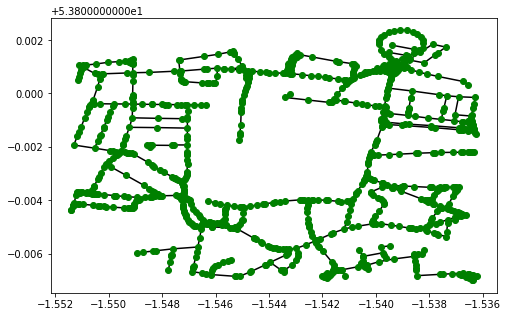

In [29]:
# Check what this new network looks like by getting DataFrames for the edges and plotting them
nodes_df, edges_df = spaghetti.element_as_gdf(
    Leeds_points_graph, vertices=True, arcs=True)

base_network = edges_df.plot(color = "black", zorder=0, figsize=(8, 8))
nodes_df.plot(ax=base_network, color="g", zorder=2)

In [30]:

# We will now snap the Leeds centre located traffic we extracted earlier, 
# i.e. position them at the closest point on the closest road
Leeds_points_graph.snapobservations(Leeds_Centre_points, 'traffic')

# Show the difference between the original traffic coordinates and their position when snapped to the road network
print("observation 1\ntrue coords:\t%s\nsnapped coords:\t%s" % (
    Leeds_points_graph.pointpatterns["traffic"].points[0]["coordinates"],
    Leeds_points_graph.pointpatterns["traffic"].snapped_coordinates[0]
))

observation 1
true coords:	(-1.540015326332278, 53.79512715660742)
snapped coords:	(-1.5400150283058185, 53.7951153509141)


/Users/orianna/opt/anaconda3/lib/python3.8/site-packages/libpysal/cg/shapes.py:103: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)
/Users/orianna/opt/anaconda3/lib/python3.8/site-packages/libpysal/cg/shapes.py:1006: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)
/Users/orianna/opt/anaconda3/lib/python3.8/site-packages/libpysal/cg/shapes.py:1923: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)


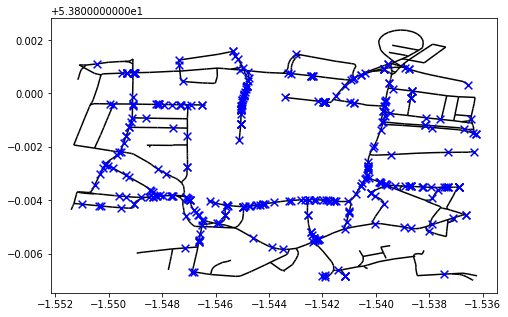

In [31]:
# Show the network
base_network = edges_df.plot(color="k", zorder=0, figsize =(8, 8))
# Get a GeoDataFrame of the snapped traffic locations to plot on the network image
snapped_Leeds=spaghetti.element_as_gdf(
    Leeds_points_graph, pp_name='traffic', snapped=True)

# Plot these on Leeds centre road network
snapped_Leeds.plot(
    color="b", marker="x",
    markersize=60, zorder=1, ax=base_network)

# Show all the traffic accident points in Leeds city centre
plt.show()

Using the K-function analysis provided by spaghetti. 

For each point, the density of other points within a series of bands at increasing steps of distance is calculated, where the number of bands is given by variable nsteps. This is then averaged across points to get the K value. 

Alongside this, it is simulated what density would be seen under instances of complete spatial randomness of distribution of points on the network (a Monte Carlo simulation). As each instance of a random placing of points will be different, it runs this simulation a number of times, given by parameter permutations. Looking at the range of values produced by the simulations gives us an approximation of the lower and upper bounds of density expected with a random distribution: if the real values don't fall in these bounds, we may conclude they are not random (either more clustered or more uniform than expected).

In [32]:
kres = Leeds_points_graph.GlobalAutoK(
    Leeds_points_graph.pointpatterns["traffic"],
    nsteps=100, permutations=100
)

In [33]:
# Attribute lam is the density of points on the network as a whole (the lambda value).
# The axis attribute is the list of distances at which density is measured, i.e. the bands.
# The observed is for our real data
# The upperenvelope and lowerenvelope give the maximum and minimum values found in the simulation
# The sim is the data from all the simulations: a list of lists of K-function values.
kres.lam
kres.xaxis
kres.observed
kres.upperenvelope
kres.lowerenvelope
kres.sim

print(f"Density of points in the network (lambda): {kres.lam}")

Density of points in the network (lambda): 1999.278133604374


In [34]:
print(f"Distances at which density is measured:\n{kres.xaxis}")

Distances at which density is measured:
[0.         0.00023885 0.0004777  0.00071655 0.0009554  0.00119425
 0.0014331  0.00167195 0.00191079 0.00214964 0.00238849 0.00262734
 0.00286619 0.00310504 0.00334389 0.00358274 0.00382159 0.00406044
 0.00429929 0.00453814 0.00477699 0.00501584 0.00525469 0.00549353
 0.00573238 0.00597123 0.00621008 0.00644893 0.00668778 0.00692663
 0.00716548 0.00740433 0.00764318 0.00788203 0.00812088 0.00835973
 0.00859858 0.00883743 0.00907627 0.00931512 0.00955397 0.00979282
 0.01003167 0.01027052 0.01050937 0.01074822 0.01098707 0.01122592
 0.01146477 0.01170362 0.01194247 0.01218132 0.01242017 0.01265901
 0.01289786 0.01313671 0.01337556 0.01361441 0.01385326 0.01409211
 0.01433096 0.01456981 0.01480866 0.01504751 0.01528636 0.01552521
 0.01576406 0.01600291 0.01624175 0.0164806  0.01671945 0.0169583
 0.01719715 0.017436   0.01767485 0.0179137  0.01815255 0.0183914
 0.01863025 0.0188691  0.01910795 0.0193468  0.01958565 0.01982449
 0.02006334 0.02030219 0

We can now plot the above data so that we can judge it visually. The code below will create a plot with three lines: the observed K-function values as the band distance increases, and the upper and lower bounds from the simulations.

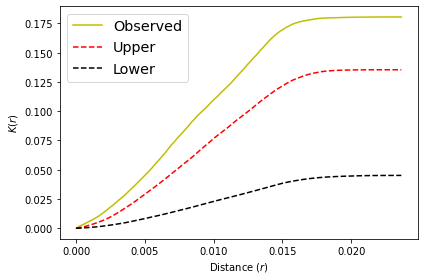

In [35]:
fig, ax = plt.subplots()

ax.plot(kres.xaxis, kres.observed, "y-", label="Observed")
ax.plot(kres.xaxis, kres.upperenvelope, "r--", label="Upper")
ax.plot(kres.xaxis, kres.lowerenvelope, "k--", label="Lower")

ax.legend(loc="best", fontsize="x-large")
ax.set_xlabel("Distance $(r)$")
ax.set_ylabel("$K(r)$")

fig.tight_layout()

The above seems to show that, at all distances and increasing as distance increases, the points are more clustered than would be expected.

However, we need to be aware that the accident data is not showing the precise locations of accidents but just what street each accident occurred on. 

Because of this, it is perhaps more meaningful to look at accident counts per street. We will then ask whether these counts are spatially autocorrelated on the network space. 

To do this, we first get the pattern of crime points snapped to the network, and then get the count of points per each street (network edge).

In [36]:
# Get snapped point pattern
pointpat = Leeds_points_graph.pointpatterns['traffic']
# Get count of points per network edge: a dictionary from each edge to the accident count on that edge
counts = Leeds_points_graph.count_per_link(pointpat.obs_to_arc, graph=False)

Next, we need our spatial weights. 

This is the edge adjacency matrix, i.e. a matrix where the edges are the rows and columns and there is a 1 wherever the edges are connected by a node, 0 otherwise.

In [37]:
# Get the weights matrix for edges in the graph (just the adjacency matrix with 1 where edges connect at a node, 0 otherwise)
weights = Leeds_points_graph.w_network

Put the edge counts in a list in the same order as the weights.

In [38]:
# Get the edges included in the weights matrix: an enumerator for a list of edges
edges = weights.neighbors.keys()
# Construct an array of the counts values per edge in the same order as the weights matrix, with 0.0 where no counts recorded
values = [counts[edge] if edge in counts.keys () else 0. \
    for index, edge in enumerate(edges)]

Now calculate Moran's I using the accident count values and weights.

In [39]:
moran = esda.moran.Moran(values, weights)
moran.I

0.0924007865027406

Positive spatial autocorrelation: A positive Moran's I value suggests that there is a tendency for similar values (in this case, accident counts) to be clustered together on the network. This means that areas with high accident counts are likely to be surrounded by other areas with high accident counts, and areas with low accident counts are surrounded by other areas with low accident counts.

Strength of autocorrelation: The absolute magnitude of Moran's I (0.0924007865027406) indicates the strength of the spatial autocorrelation. In this case, the value is relatively small, suggesting a weak positive spatial autocorrelation. This means that while there is a tendency for accidents to be somewhat clustered on the network, the clustering pattern is not particularly strong.

In [40]:
moran.p_sim

0.007

In [41]:
moran.EI

-0.0009891196834817012

In [42]:
moran.EI_sim

0.0005102023855310695

In [43]:
moran.z_norm

3.169725792365333

In [44]:
moran.z_sim

3.0509301719020896

Moran's I Value: The observed Moran's I value is 0.0924007865027406, indicating a positive spatial autocorrelation in the distribution of points on the network. This suggests a tendency for points to cluster together.

Moran's I Significance: The p-value (moran.p_sim) is 0.007, indicating that the observed Moran's I value is statistically significant, deviating significantly from the null hypothesis. Thus, we can confirm that the spatial autocorrelation in the point distribution is statistically significant.

Expected Moran's I: The expected Moran's I value (moran.EI) is -0.0009891196834817012, indicating that under the assumption of spatial randomness, the expected Moran's I value is close to zero. This suggests that the point distribution does not exhibit a strong tendency to cluster.

Standardized Moran's I: The standardized Moran's I value (moran.z_norm) is 3.169725792365333, indicating that the observed Moran's I value significantly deviates from the null hypothesis of spatial randomness. It suggests a strong positive spatial autocorrelation.

Expected Standardized Moran's I: The simulated average standardized Moran's I value (moran.z_sim) is 3.0509301719020896, which is close to the observed Moran's I value. This further supports the existence of statistically significant spatial autocorrelation.

In summary, the data indicates a significant positive spatial autocorrelation in the distribution of points on the network. This suggests that the number of accidents occurring on certain streets or network edges is associated with the number of accidents in the surrounding areas or adjacent network edges. 